<h1>CUSTOMER CLUSTERING AI PROJECT<h1/>
<h2>AI PROJECT MEMBERS</h2>
<ol>
  <li>Muhammad Anique <b>20L-2171</b></li>
  <li>Kaashaan Karim  <b>20L-2073</b></li>
  <li>Hammad Zahoor <b>20L-0971</b></li>
</ol>

<h2>AI PROJECT PART 1 DATA COLLECTION</h2>
<ul>
  <li>Obtain a dataset of customer data that includes information such as customer ID, age, income, location, spending habits, etc</li>
  <li>Make sure that the dataset is complete and includes information on all relevant customer characteristics.</li>
</ul>

<h6><b>1. </b>  Importing Libraries</h6>


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import plotly as py
import plotly.graph_objs as go
import warnings
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings("ignore")
import random

<h6><b>2. </b>  Collecting Data</h6>


In [ ]:
#Data Collection in CSV file
DF = pd.read_csv('Mall_Customers.csv', encoding='utf-8')
DF.head()

print(DF)

     CustomerID  Age  Gender  Income (Rs. k)  Spending Score (1-100)  Location
0             1   19    Male              15                      39   Karachi
1             2   21    Male              15                      81    Lahore
2             3   20  Female              16                       6  Peshawar
3             4   23  Female              16                      77    Quetta
4             5   31  Female              17                      40   Karachi
..          ...  ...     ...             ...                     ...       ...
195         196   35  Female             120                      79    Quetta
196         197   45  Female             126                      28  Peshawar
197         198   32    Male             126                      74    Quetta
198         199   32    Male             137                      18  Peshawar
199         200   30    Male             137                      83    Lahore

[200 rows x 6 columns]


In [ ]:
def Insert_Row(age, gender, income, score, location)
    last_row = DF.iloc[-1]
    value =  last_row['CustomerID']
    new_row = {'CustomerID': value+1,
              'Age':age,
              'Gender': gender,
              'Income (Rs. k)': income,
              'Spending Score (1-100)': score,
              'Location': location}

    # insert the dictionary at the end of the DataFrame
    DF = DF.append(new_row, ignore_index=True)
    print(DF);


<h6><b>3. </b> Preprocessing Data</h6>


In [ ]:
#DataPreprocessing
DF = pd.read_csv('./Mall_Customers.csv',index_col=[0])

#Filling Any Missing Values
DF['Age']=DF['Age'].fillna(DF['Age'].mode())
DF['Gender']=DF['Gender'].fillna(method='bfill')
DF['Location']=DF['Location'].fillna(method='bfill')
DF['Gender']=DF['Gender'].fillna(method='ffill')
DF['Location']=DF['Location'].fillna(method='ffill')
DF['Income (Rs. k)']=DF['Income (Rs. k)'].fillna(DF['Income (Rs. k)'].mean())
DF['Spending Score (1-100)']=DF['Spending Score (1-100)'].fillna(DF['Spending Score (1-100)'].median())
DF = DF.interpolate(method='linear', limit_direction='forward');

#wrting updated dataSet
DF.to_csv('Customer_Data.csv', encoding='utf-8')

NOTE :-  <b>DF</b> contain preprocessed Data

<h6><b>4. </b>  Data Exploration</h6>


In [ ]:
#ExploringData
data = pd.read_csv('./Customer_Data.csv')
data.info();
print(data.describe());
print(data.corr());

Female    112
Male       88
Name: Gender, dtype: int64

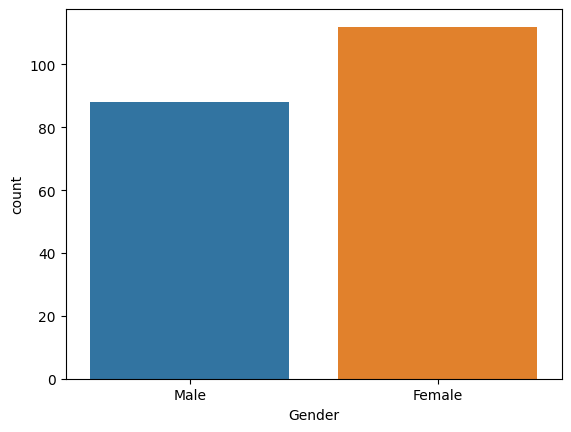

In [ ]:
#Encoding Categorical Variables
# Male - Female distribution of data
sns.countplot(x="Gender", data=data)
data.loc[:,'Gender'].value_counts()
#print(DF)

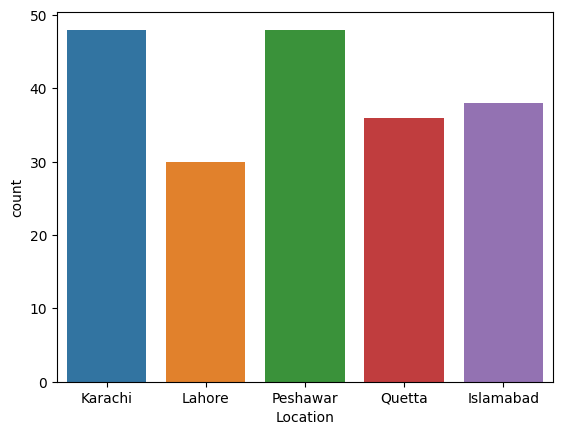

In [ ]:
#City Data Distribution
sns.countplot(x="Location", data=data)
data.loc[:,'Location'].value_counts()
DF=data;

<h6><b>5. </b>  Data Encoding</h6>



Encoding Gender

In [ ]:
gender_u = data.iloc[:,2:3].values
#print(gender_u);
# Due to encoding, categoric data is transformed to numeric data namely 0 and 1s.
le = LabelEncoder()
gender_u[:,0] = le.fit_transform(gender_u[:,0])
gender_u=gender_u.flatten();
#print(gender_u)


Encoding Location

In [ ]:
location_u = data.iloc[:,5:6].values
#print(location_u);
le = LabelEncoder()
location_u[:,0] = le.fit_transform(location_u[:,0])
location_u=location_u.flatten();
#print(location_u)

<h5>ENCODED AND PROCESSED DATASET</h5>

In [ ]:
r1={'Gender':gender_u}
r2={'Location':location_u}
R1 = pd.DataFrame(r1);
R2 = pd.DataFrame(r2)
R3= DF.iloc[:,0:2]; # if we are to drop Customer ID
R4 =DF.iloc[:,3:5];
R4.head();
UF = pd.concat([R3,R1,R4,R2], axis=1)
# DF= UF;
UF.head()
# print(DF)


,CustomerID,Age,Gender,Income (Rs. k),Spending Score (1-100),Location
0,1,19,1,15,39,1
1,2,21,1,15,81,2
2,3,20,0,16,6,3
3,4,23,0,16,77,4
4,5,31,0,17,40,1



<ol>
  <li>DF =  <b>Non Encoded Daatset</b></li>
  <li>UF =   <b>Encoded DataSet</b></li>
</ol>

<h6><b>6. </b>  Normalizing Data</h6>


In [ ]:
# Standardization is the process of putting different variables on the same scale.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
n_data = sc.fit_transform(UF)   #--> n_data means normalized data it need to be used further
DF_S = pd.DataFrame(data=n_data, columns=['ID','Age','Gender','Income','Spending Score','Location']);
DF_S.to_csv('Customer_Data_SD.csv', encoding='utf-8')
print(DF_S)

           ID       Age    Gender    Income  Spending Score  Location
0   -1.723412 -1.424569  1.128152 -1.738999       -0.434801 -0.700071
1   -1.706091 -1.281035  1.128152 -1.738999        1.195704  0.014287
2   -1.688771 -1.352802 -0.886405 -1.700830       -1.715913  0.728646
3   -1.671450 -1.137502 -0.886405 -1.700830        1.040418  1.443004
4   -1.654129 -0.563369 -0.886405 -1.662660       -0.395980 -0.700071
..        ...       ...       ...       ...             ...       ...
195  1.654129 -0.276302 -0.886405  2.268791        1.118061  1.443004
196  1.671450  0.441365 -0.886405  2.497807       -0.861839  0.728646
197  1.688771 -0.491602  1.128152  2.497807        0.923953  1.443004
198  1.706091 -0.491602  1.128152  2.917671       -1.250054  0.728646
199  1.723412 -0.635135  1.128152  2.917671        1.273347  0.014287

[200 rows x 6 columns]


<h2>AI PROJECT PART 2 CLUSTERING</h2>
<ul>
  <li>Visulaize Data</li>
  <li>Clustering Models</li>
  <li>Evaluation</li>
</ul>

<h6><b>7. </b>  Data Visualization</h6>


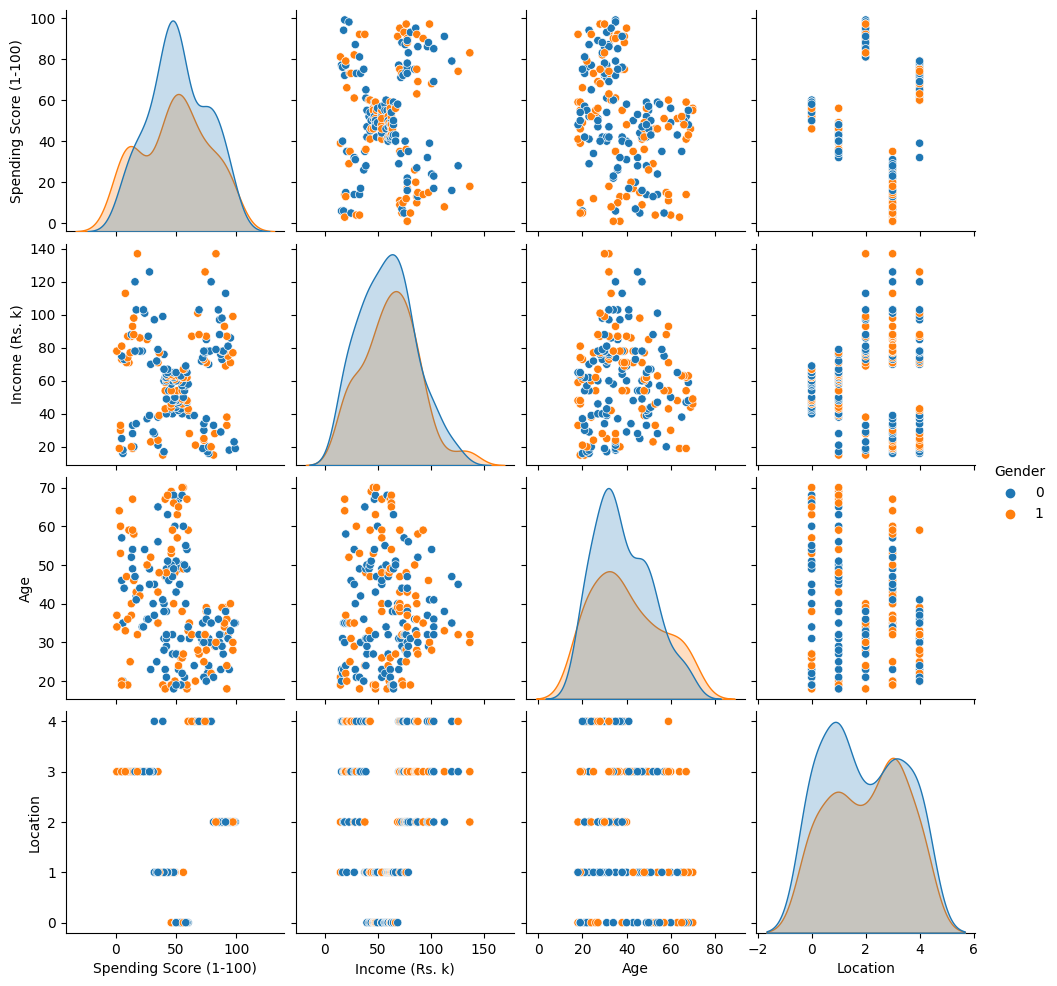

In [ ]:
sns.pairplot(UF, vars = ['Spending Score (1-100)', 'Income (Rs. k)', 'Age','Location'], hue = "Gender")

<h6><b>8. </b>  PAIR PLOTTING 1</h6>


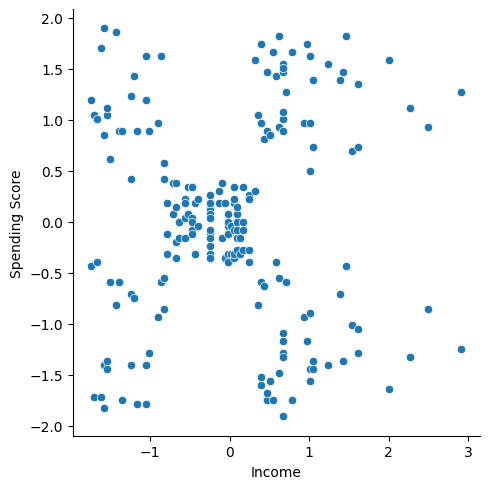

In [ ]:
sns.relplot(x="Income",y = "Spending Score",data=DF_S)


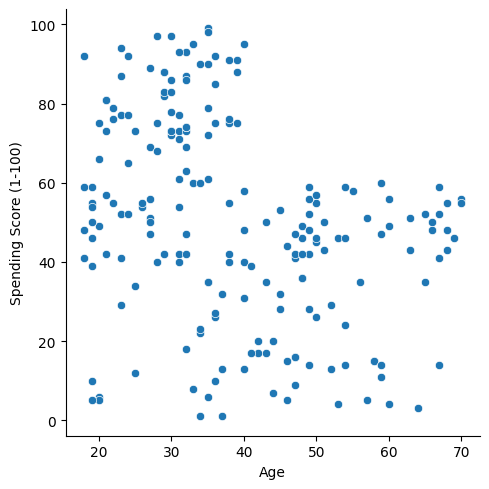

In [ ]:
sns.relplot(x="Age",y = "Spending Score (1-100)",data=UF)


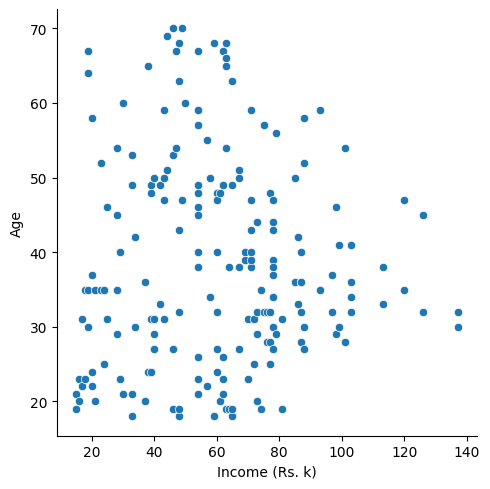

In [ ]:
sns.relplot(x="Income (Rs. k)",y = "Age",data=UF)


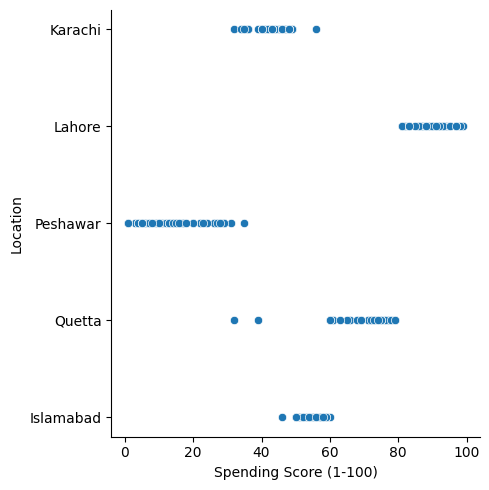

In [ ]:
sns.relplot(x="Spending Score (1-100)",y = "Location",data=DF)

In [ ]:
df = DF_S

<h1>K-Means CLustering</h1>

1. Initilaizing Data


In [ ]:
X3 = df[['Age' , 'Income' ,'Spending Score']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n, init='k-means++', n_init = 10, max_iter=300,
                        tol=0.0001, random_state= 111, algorithm='elkan'))
    algorithm.fit(X3)
    inertia.append(algorithm.inertia_)

2. Plotting a line (for Noof Clusters)

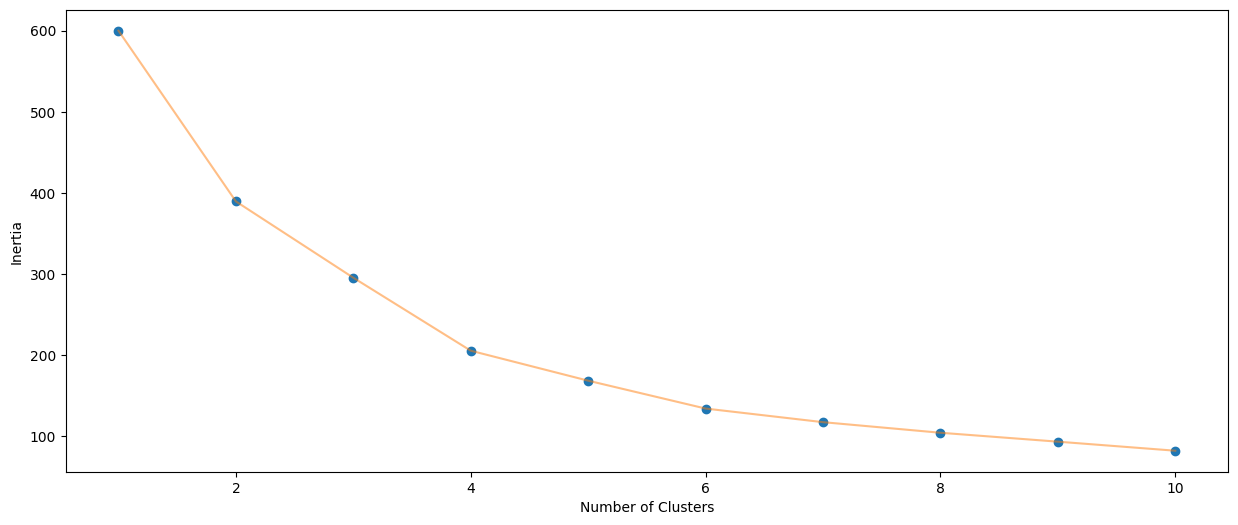

In [ ]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()


3. Selecting Good Number of Cluster

In [ ]:
#Selecting good number of clusters
from sklearn.metrics import silhouette_score
score =0;
k_ = 3;
val =0;
max=0;
silhouette_avg =0.1;
for i in range(1,10) :
    kmeans = KMeans(n_clusters=k_, random_state=42)
    cluster_labels = kmeans.fit_predict(X3)
    print("Cluster = ",k_);
    # Calculate the Silhouette score
    silhouette_avg = silhouette_score(X3, cluster_labels)
    print("score = ",silhouette_avg)
    if max < silhouette_avg :
      val=k_
      max= silhouette_avg
    # Print the Silhouette score
    k_+=1;
k_=val;
print(val)

Cluster =  3
score =  0.357793388710272
Cluster =  4
score =  0.4039582785148566
Cluster =  5
score =  0.41664341513732767
Cluster =  6
score =  0.4284167762892593
Cluster =  7
score =  0.4111545340123845
Cluster =  8
score =  0.408443059554235
Cluster =  9
score =  0.4200735068174298
Cluster =  10
score =  0.42261564078864017
Cluster =  11
score =  0.4036984597830522
6


4. Applying the Algorithm

In [ ]:
scaler = StandardScaler()
n_data = scaler.fit_transform(UF)
algorithm = (KMeans(n_clusters = k_ ,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X3)
labels3 = algorithm.labels_
centroids3 = algorithm.cluster_centers_
y_kmeans = algorithm.fit_predict(X3)


In [ ]:
# With Denormalizing
# Denormalize the standardized data
denormalized_data = scaler.inverse_transform(n_data)
# Convert the denormalized data back to a Pandas DataFrame
df2 = pd.DataFrame(denormalized_data)
df2['cluster'] = pd.DataFrame(y_kmeans)
# rename the columns
df2 = df2.rename(columns={0: 'ID', 1: 'Age', 2: 'Gender', 3 : 'Income', 4:'Spending Scroe',5:'Location'})
df2.head()



,ID,Age,Gender,Income,Spending Scroe,Location,cluster
0,1.0,19.0,1.0,15.0,39.0,1.0,5
1,2.0,21.0,1.0,15.0,81.0,2.0,5
2,3.0,20.0,0.0,16.0,6.0,3.0,4
3,4.0,23.0,0.0,16.0,77.0,4.0,5
4,5.0,31.0,0.0,17.0,40.0,1.0,4


In [ ]:
# Without Denormalizing
df['cluster'] = pd.DataFrame(y_kmeans)
df.head()

,ID,Age,Gender,Income,Spending Score,Location,cluster
0,-1.723412,-1.424569,1.128152,-1.738999,-0.434801,-0.700071,5
1,-1.706091,-1.281035,1.128152,-1.738999,1.195704,0.014287,5
2,-1.688771,-1.352802,-0.886405,-1.700830,-1.715913,0.728646,4
3,-1.671450,-1.137502,-0.886405,-1.700830,1.040418,1.443004,5
4,-1.654129,-0.563369,-0.886405,-1.662660,-0.395980,-0.700071,4


K-means CLustering 3d Plot

In [ ]:
trace1 = go.Scatter3d(
    x= df['Age'],
    y= df['Spending Score'],
    z= df['Income'],
    mode='markers',
     marker=dict(
        color = df['cluster'],
        size= 10,
        line=dict(
            color= df['cluster'],
            width= 12
        ),
        opacity=0.8
     )
)
data = [trace1]
layout = go.Layout(
    title= 'Clusters wrt Age, Income and Spending Scores',
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Spending Score'),
            zaxis = dict(title  = 'Annual Income'),
        )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

6. Evaluation

In [ ]:
print(k_)
#Selecting good number of clusters
from sklearn.metrics import silhouette_score
kmeans = KMeans(n_clusters=k_, random_state=42)
cluster_labels = kmeans.fit_predict(X3)
# Calculate the Silhouette score
silhouette_avg = silhouette_score(X3, cluster_labels)
print("Silhoutte Score :: ",silhouette_avg);


7
Silhoutte Score ::  0.4111545340123845


<h1>K_MEDOID</h1>

In [ ]:
from sklearn_extra.cluster import KMedoids
from sklearn.datasets import make_blobs

# Generate random data
X, y = make_blobs(n_samples=100, centers=3, n_features=2, random_state=0)

# Initialize KMedoids
kmedoids = KMedoids(n_clusters=3, random_state=0)

# Fit the model to the data
kmedoids.fit(X)

# Get the cluster labels and cluster centers
labels = kmedoids.labels_
centers = kmedoids.cluster_centers_

# Print the results
print("Cluster labels:", labels)
print("Cluster centers:", centers)